### Pandas Series

Структура/объект Series представляет из себя объект, похожий на одномерный массив (питоновский список, например), но отличительной его чертой является наличие ассоциированных меток, т.н. индексов, вдоль каждого элемента из списка. Такая особенность превращает его в ассоциативный массив или словарь в Python.

In [1]:
import pandas as pd
import numpy as np

my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [4]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [5]:
my_series.values

array([ 5,  6,  7,  8,  9, 10], dtype=int64)

In [6]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], 
                       index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2

a     5
b     6
c     7
d     8
e     9
f    10
dtype: int64

In [7]:
my_series2.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [8]:
my_series[4]

9

In [9]:
my_series[[4]]

4    9
dtype: int64

In [10]:
my_series2['a']

5

In [11]:
mask = my_series > 7

In [12]:
mask

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [13]:
my_series[mask]

3     8
4     9
5    10
dtype: int64

In [14]:
my_series2[['a', 'b', 'f']] = 0
my_series2

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64

In [19]:
my_series2[(my_series2 > 0)]

c    7
d    8
e    9
dtype: int64

In [14]:
my_series2 > 0

a    False
b    False
c     True
d     True
e     True
f    False
dtype: bool

In [15]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

a    5
b    6
c    7
d    8
dtype: int64

In [16]:
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64

### Pandas DataFrame

Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

In [20]:
df = pd.DataFrame({
    'city': ['Moscow', 'Krasnodar', 'Belgorod', 'Kazan'],
    'delivery_time': [25, 29, 32, 30],
    'couriers': [11440, 784, 112, 998]
})
df

,city,delivery_time,couriers
0,Moscow,25,11440
1,Krasnodar,29,784
2,Belgorod,32,112
3,Kazan,30,998


In [21]:
df.delivery_time

0    25
1    29
2    32
3    30
Name: delivery_time, dtype: int64

In [22]:
type(df.delivery_time)

pandas.core.series.Series

In [23]:
df['delivery_time']

0    25
1    29
2    32
3    30
Name: delivery_time, dtype: int64

In [24]:
df[['delivery_time']]

,delivery_time
0,25
1,29
2,32
3,30


In [25]:
df.index = ['Msc', 'Krd', 'Blg', 'Kzn']
df

,city,delivery_time,couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Blg,Belgorod,32,112
Kzn,Kazan,30,998


**Импорт данных**

In [26]:
# pd.read_csv('filename')
# pd.read_excel('filename')
# pd.read_sql(query,connection_object) 
# pd.read_table(filename)
# pd.read_json(json_string)
# pd.read_html(url) 
# pd.read_clipboard()
# pd.DataFrame(dict)

In [27]:
ml = pd.read_csv('files/orders_history.csv', sep = ',')
ml.head(2)

,order_date,rider_assigned,food_picked_up,food_delivered,successful_order,failed_order,rider_id,vendor_id,price
0,2021-07-01 08:56:13,2021-07-01 09:04:09,2021-07-01 09:17:01,2021-07-01 09:29:58,1,0,bb2eac1de1b6d2b301fba4f2479c8cbf,ff6609fc0bf8b3824811a4ae7d431fd6,244.0
1,2021-07-01 10:16:07,2021-07-01 10:16:36,2021-07-01 10:49:33,2021-07-01 11:04:07,1,0,e46bfb686b9ff1d9de75f8d9ac604311,9e08b7b5bbd7d6162da8db1c8bb78f03,1064.0


Отдельно стоит упомянуть про возможность работы в Pandas с большими файлами, которые могут не помещаться в оперативную память компьютера. Для этого мы можем читать файл небольшими чанками.

In [28]:
c_size = 10000 

for gm_chunk in pd.read_csv('files/orders_history.csv', 
                            sep = ',', 
                            chunksize=c_size):
    print(gm_chunk.shape)

(10000, 9)
(10000, 9)
(10000, 9)
(10000, 9)
(7944, 9)


**Экспорт данных**

In [26]:
# df.to_csv(filename) 
# df.to_excel(filename) 
# df.to_sql(table_name, connection_object)
# df.to_json(filename)
# df.to_html(filename)
# df.to_clipboard()

**Доступ к данным**

Доступ к строкам по индексу возможен несколькими способами:

- .loc - используется для доступа по строковой метке
- .iloc - используется для доступа по числовому значению (начиная от 0)

In [27]:
df.loc['Msc']

city             Moscow
delivery_time        25
couriers          11440
Name: Msc, dtype: object

In [28]:
df

,city,delivery_time,couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Blg,Belgorod,32,112
Kzn,Kazan,30,998


In [29]:
df.iloc[1]

city             Krasnodar
delivery_time           29
couriers               784
Name: Krd, dtype: object

In [30]:
type(df.iloc[0])

pandas.core.series.Series

In [31]:
#индекс + колонки
df.loc[['Msc', 'Kzn'], 'couriers']

Msc    11440
Kzn      998
Name: couriers, dtype: int64

В .loc и .iloc запомнить, что первая часть относится к строкам, вторая - к столбцам.

In [32]:
df

,city,delivery_time,couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Blg,Belgorod,32,112
Kzn,Kazan,30,998


In [34]:
df.iloc[[0,1],[1]]

,delivery_time
Msc,25
Krd,29


In [35]:
df[df.delivery_time > 30][['city', 'couriers']]

,city,couriers
Blg,Belgorod,112


In [36]:
#более сложное условие
df[(df.delivery_time >= 25) | (df.city == 'Msc')][['city','delivery_time']]

,city,delivery_time
Msc,Moscow,25
Krd,Krasnodar,29
Blg,Belgorod,32
Kzn,Kazan,30


In [37]:
# Или так
filters = (df.city == 'Moscow')
df[filters]

,city,delivery_time,couriers
Msc,Moscow,25,11440


In [63]:
# Создаем новую колонку 
df['delivery_time_hours'] = df['delivery_time'] / 60
df

,city,delivery_time,couriers,delivery_time_hours
Msc,Moscow,25,11440,0.416667
Krd,Krasnodar,29,784,0.483333
Blg,Belgorod,32,112,0.533333
Kzn,Kazan,30,998,0.500000


In [64]:
# Обратить внимание, что при дропе колонок необходимо в том или ином виде перезаписывать данные в исходном датафрейме
df.drop(['delivery_time_hours'], axis=1)
# df.drop(['delivery_time_hours'], axis='columns',inplace =True)

,city,delivery_time,couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Blg,Belgorod,32,112
Kzn,Kazan,30,998


In [65]:
df = df.drop(['delivery_time_hours'], axis=1)
df

,city,delivery_time,couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Blg,Belgorod,32,112
Kzn,Kazan,30,998


In [67]:
df = df.rename(columns={'couriers': 'num_of_couriers'})
df

,city,delivery_time,num_of_couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Blg,Belgorod,32,112
Kzn,Kazan,30,998


In [68]:
# вытаскивает n самых больших показателей из колонки - нет нужды в сортировке
df.nlargest(3,'delivery_time')

,city,delivery_time,num_of_couriers
Blg,Belgorod,32,112
Kzn,Kazan,30,998
Krd,Krasnodar,29,784


In [69]:
df.nsmallest(3,'delivery_time')

,city,delivery_time,num_of_couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Kzn,Kazan,30,998


In [70]:
df.columns = ['City', 'Delivery_Time', 'Number_of_Couriers']

In [71]:
df

,City,Delivery_Time,Number_of_Couriers
Msc,Moscow,25,11440
Krd,Krasnodar,29,784
Blg,Belgorod,32,112
Kzn,Kazan,30,998


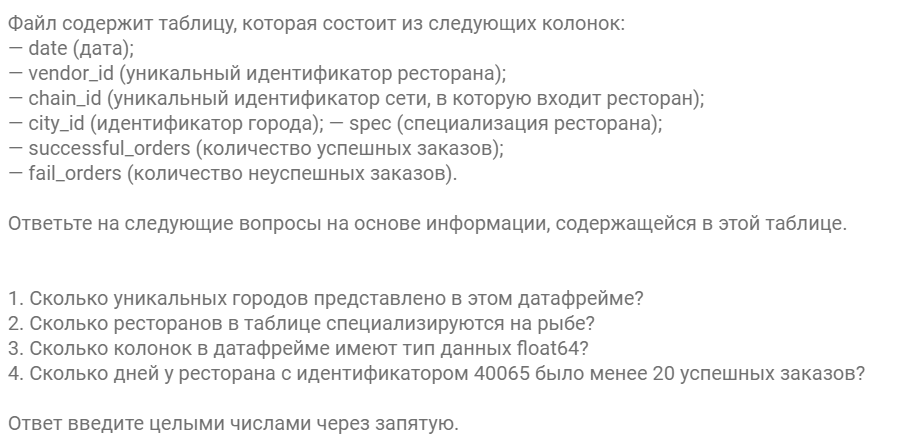

In [115]:
df = pd.read_csv('orders.csv')
df.head(5)

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Суши,54.0,1.0
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0
4,2019-09-21,43919,30984,25,Суши,6.0,0.0


In [129]:
print('Кол-во уникальных городов: {}'.format(df['city_id'].unique().shape[0]))
print('Кол-во ресторанов, специализирующихся на рыбе: {}'.format(df[df['spec'] == 'Рыба'].vendor_id.unique().shape[0]))
print('Кол-во колонок с типом данных float64: {}'.format(df.dtypes[df.dtypes == 'float64'].count()))
print('Кол-во дней, когда у ресторана с идентификатором 40065 было менее 20 успешных заказов: {}'.format(df[(df.vendor_id == 40065)|(df.successful_orders < 20)].date.count()))

Кол-во уникальных городов: 4
Кол-во ресторанов, специализирующихся на рыбе: 18
Кол-во колонок с типом данных float64: 2
Кол-во дней, когда у ресторана с идентификатором 40065 было менее 20 успешных заказов: 84682
